In [1]:
import matplotlib.pyplot as plt


In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("sentiment-analysis-cleaned.csv")


In [4]:
df

,text,sentiment
0,I love this product!,Positive
1,The service was terrible.,Negative
2,This movie is amazing!,Positive
3,I'm so disappointed with their customer support.,Negative
4,Just had the best meal of my life!,Positive
...,...,...
80,"The delivery was standard, no issues.",Neutral
81,The product works as expected.,Neutral
82,"Average quality, nothing special.",Neutral
83,The experience was neither good nor bad.,Neutral


In [5]:
print(df.shape)

(85, 2)


In [6]:
label_map = {
    "Negative": 0,
    "Neutral": 1,
    "Positive": 2
}

In [7]:
df["label"] = df["sentiment"].map(label_map)

# Save updated dataset
df.to_csv("sentiment_data_labeled.csv", index=False)

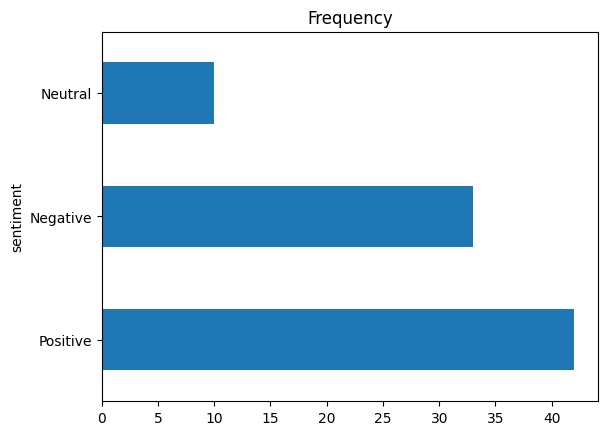

In [8]:
label_counts = df['sentiment'].value_counts()
label_counts
label_counts.plot.barh()
plt.title("Frequency")
plt.show()

In [9]:
df['Words Per Text'] = df['text'].str.split().apply(len)

In [10]:
df

,text,sentiment,label,Words Per Text
0,I love this product!,Positive,2,4
1,The service was terrible.,Negative,0,4
2,This movie is amazing!,Positive,2,4
3,I'm so disappointed with their customer support.,Negative,0,7
4,Just had the best meal of my life!,Positive,2,8
...,...,...,...,...
80,"The delivery was standard, no issues.",Neutral,1,6
81,The product works as expected.,Neutral,1,5
82,"Average quality, nothing special.",Neutral,1,4
83,The experience was neither good nor bad.,Neutral,1,7


In [11]:
from transformers import AutoTokenizer

model_ckpt = "bert-base-uncased"

In [12]:
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [13]:
text = "i love NLP"
encoded_text = tokenizer(text)

In [14]:
encoded_text

{'input_ids': [101, 1045, 2293, 17953, 2361, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1]}

In [15]:
tokenizer.vocab

{'sb': 24829,
 'quaker': 18844,
 'employee': 7904,
 '##sus': 13203,
 'telescope': 12772,
 'turnpike': 17116,
 'donegal': 25415,
 '木': 1875,
 'pursued': 9505,
 '1885': 6571,
 'firearm': 23646,
 'arrow': 8612,
 'insides': 19008,
 'centralized': 22493,
 'jett': 22962,
 '23': 2603,
 '13': 2410,
 '##vana': 27313,
 'friars': 24037,
 '[unused695]': 700,
 'establishments': 17228,
 '##smith': 21405,
 '##∅': 30121,
 'ate': 8823,
 '##rative': 18514,
 'veterinary': 15651,
 '##biotic': 26591,
 '##co': 3597,
 'snake': 7488,
 '真': 1921,
 'da': 4830,
 'planck': 26486,
 'termination': 18287,
 'repay': 24565,
 'upscale': 28276,
 'strongly': 6118,
 'beings': 9552,
 'hated': 6283,
 'coalition': 6056,
 'minors': 18464,
 'spine': 8560,
 'gordon': 5146,
 '##ћ': 29764,
 'commonplace': 27550,
 'liverpool': 6220,
 'mechanized': 23387,
 'distributing': 20083,
 'counts': 9294,
 'chunks': 24839,
 'indicate': 5769,
 'idiots': 28781,
 'nh': 18699,
 'monaco': 14497,
 '##ically': 15004,
 'enter': 4607,
 'ucla': 12389,

## Dataloader & Train Test Split

In [16]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2, stratify=df["sentiment"])
test, validation = train_test_split(test, test_size=1/3, stratify=test["sentiment"])

In [17]:
test.shape, validation.shape, train.shape

((11, 4), (6, 4), (68, 4))

In [18]:
from datasets import Dataset, DatasetDict

dataset = DatasetDict(
    {
        'train':Dataset.from_pandas(train, preserve_index = False),
        'test':Dataset.from_pandas(test, preserve_index = False),
        'validation': Dataset.from_pandas(validation, preserve_index = False)
    }
)

In [19]:
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'sentiment', 'label', 'Words Per Text'],
        num_rows: 68
    })
    test: Dataset({
        features: ['text', 'sentiment', 'label', 'Words Per Text'],
        num_rows: 11
    })
    validation: Dataset({
        features: ['text', 'sentiment', 'label', 'Words Per Text'],
        num_rows: 6
    })
})

## Tokenization Of Emotion/Sentiment Data

In [20]:
dataset['train'][0]

{'text': 'The hotel stay was absolutely amazing! Luxury at its finest.',
 'sentiment': 'Positive',
 'label': 2,
 'Words Per Text': 10}

In [21]:
def tokenize(batch):
  temp  = tokenizer(batch['text'], padding=True, truncation=True)
  return temp

print(tokenize(dataset['train'][:2]))

{'input_ids': [[101, 1996, 3309, 2994, 2001, 7078, 6429, 999, 9542, 2012, 2049, 10418, 1012, 102], [101, 1996, 2833, 2012, 2023, 4825, 2001, 5151, 1012, 3811, 6749, 999, 102, 0]], 'token_type_ids': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0]]}


In [22]:
emotion_encoded = dataset.map(tokenize, batched=True, batch_size=None)

Map:   0%|          | 0/68 [00:00<?, ? examples/s]

Map:   0%|          | 0/11 [00:00<?, ? examples/s]

Map:   0%|          | 0/6 [00:00<?, ? examples/s]

In [23]:
emotion_encoded

DatasetDict({
    train: Dataset({
        features: ['text', 'sentiment', 'label', 'Words Per Text', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 68
    })
    test: Dataset({
        features: ['text', 'sentiment', 'label', 'Words Per Text', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 11
    })
    validation: Dataset({
        features: ['text', 'sentiment', 'label', 'Words Per Text', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 6
    })
})

In [24]:
# label2id id2label
label2id = {x['sentiment']:x['label'] for x in dataset['train']}
id2label = {v:k for k,v in label2id.items()}

In [25]:
label2id

{'Positive': 2, 'Negative': 0, 'Neutral': 1}

## Model Building

In [26]:
from transformers import AutoModel
import torch

In [27]:
model_ckpt

'bert-base-uncased'

In [28]:
model = AutoModel.from_pretrained(model_ckpt)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [29]:
model

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False

No Classification Head in this Model

In [30]:
model.config.architectures

['BertForMaskedLM']

In [31]:
model.config

BertConfig {
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "dtype": "float32",
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.57.1",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

in BERT the total context tokens are limited to 512 only so thus input token size is 512

Adding Classification Head

In [32]:
 from transformers import AutoModelForSequenceClassification, AutoConfig

In [33]:
num_labels = len(label2id)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [34]:
device

device(type='cuda')

In [35]:
config = AutoConfig.from_pretrained(model_ckpt, label2id=label2id, id2label=id2label)

In [36]:
model = AutoModelForSequenceClassification.from_pretrained(model_ckpt, config=config).to(device)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [37]:
model

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [38]:
model.config

BertConfig {
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "dtype": "float32",
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "Negative",
    "1": "Neutral",
    "2": "Positive"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "Negative": 0,
    "Neutral": 1,
    "Positive": 2
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.57.1",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

In [48]:
from transformers import TrainingArguments
from transformers.training_args import TrainingArguments

batch_size = 64
training_dir = "bert_base_train_dir"

training_args = TrainingArguments(
    output_dir="bert_base_train_dir",
    overwrite_output_dir=True,
    num_train_epochs=10,
    learning_rate=2e-5,
    per_device_train_batch_size=64,
    per_device_eval_batch_size=64,
    weight_decay=0.01,
    disable_tqdm=False
)

In [40]:
!pip install evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 4.8 MB/s eta 0:00:00


In [49]:
import evaluate
import numpy as np
accuracy = evaluate.load("accuracy")

In [50]:
def compute_metrics(eval_pred):
  predictions, labels = eval_pred
  predictions = np.argmax(predictions, axis=1)
  return accuracy.compute(predictions=predictions, references=labels)

In [51]:
# using sklearn to build compute metrics
from sklearn.metrics import accuracy_score, f1_score

def compute_metrics(pred):
  labels = pred.label_ids
  preds = pred.predictions.argmax(-1)

  f1 = f1_score(labels, preds, average="weighted")
  acc = accuracy_score(labels, preds)

  return {"accuracy": acc, "f1": f1}

## Building Model & Trainer

In [52]:
from transformers import Trainer

trainer = Trainer(model=model, args=training_args, compute_metrics=compute_metrics, train_dataset= emotion_encoded['train'],eval_dataset=emotion_encoded['validation'], tokenizer=tokenizer)

/tmp/ipython-input-3670884879.py:3: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(model=model, args=training_args, compute_metrics=compute_metrics, train_dataset= emotion_encoded['train'],eval_dataset=emotion_encoded['validation'], tokenizer=tokenizer)


In [45]:
emotion_encoded

DatasetDict({
    train: Dataset({
        features: ['text', 'sentiment', 'label', 'Words Per Text', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 68
    })
    test: Dataset({
        features: ['text', 'sentiment', 'label', 'Words Per Text', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 11
    })
    validation: Dataset({
        features: ['text', 'sentiment', 'label', 'Words Per Text', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 6
    })
})

In [53]:
trainer.train()

Step,Training Loss


TrainOutput(global_step=20, training_loss=0.5432058811187744, metrics={'train_runtime': 35.3199, 'train_samples_per_second': 19.253, 'train_steps_per_second': 0.566, 'total_flos': 8386740190080.0, 'train_loss': 0.5432058811187744, 'epoch': 10.0})

## Model Eval

In [54]:
preds_output = trainer.predict(emotion_encoded['test'])
preds_output.metrics

{'test_loss': 0.4610429108142853,
 'test_accuracy': 0.9090909090909091,
 'test_f1': 0.8677685950413223,
 'test_runtime': 0.0637,
 'test_samples_per_second': 172.657,
 'test_steps_per_second': 15.696}

In [56]:
y_pred = np.argmax(preds_output.predictions, axis=1)
y_true = emotion_encoded['test'][:]['label']

In [59]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       0.00      0.00      0.00         1
           2       1.00      1.00      1.00         5

    accuracy                           0.91        11
   macro avg       0.61      0.67      0.64        11
weighted avg       0.83      0.91      0.87        11



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## plot confusion matrix

In [61]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

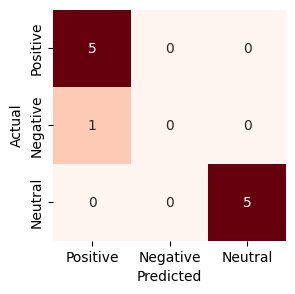

In [65]:
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(3,3))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=label2id.keys(), yticklabels=label2id.keys(), cbar=False, cmap='Reds')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## Prediction Function & Storing Model

In [66]:
text = "I'm super happy today, i got it done today, Finally!!"

input_encoded = tokenizer(text, return_tensors='pt').to(device)

with torch.no_grad():
  outputs = model(**input_encoded)

logits = outputs.logits

In [67]:
logits

tensor([[-1.3394, -0.5127,  0.6360]], device='cuda:0')

In [ ]:
## The maximum tensor value is the prediction of sentiment as it is mapped

In [69]:
pred = torch.argmax(logits, dim=1).item()

pred, id2label[pred]

(2, 'Positive')

In [70]:
def get_prediction(text):
  input_encoded = tokenizer(text, return_tensors='pt').to(device)
  with torch.no_grad():
    outputs = model(**input_encoded)
  logits = outputs.logits
  pred = torch.argmax(logits, dim=1).item()
  return id2label[pred]

get_prediction(text)

'Positive'

In [71]:
trainer.save_model("bert-base-uncased-sentiment-model")

In [ ]:
## using pipeline for prediction

In [75]:
from transformers import pipeline

classifier = pipeline('text-classification', model= 'bert-base-uncased-sentiment-model')
classifier([text, 'hello', 'i dont like you', 'you are fine'])

Device set to use cuda:0


[{'label': 'Positive', 'score': 0.6869353652000427},
 {'label': 'Positive', 'score': 0.3940318524837494},
 {'label': 'Negative', 'score': 0.6848917007446289},
 {'label': 'Positive', 'score': 0.41895610094070435}]